# Logistic Regression

# Why Logistic?

Before we move on from single neuron models, it's important to look at one more activation function, one that combines ideas of regression with binary classification. Of course, I am referring to logistic regression.

The logistic regression model uses a sigmoid activation function, which maps any input value to a value between 0 and 1. The sigmoid function is defined as:

$$\sigma(z) = \frac{1}{1+e^{-z}}$$ 

where $z$ is the input to the sigmoid function. The output of the sigmoid function can be interpreted as the probability of the positive class (i.e., the class labeled as 1) given the input features.

Just like any other single neuron model, logistic regression can represent $z$ by a linear combination of the input features $x_1, x_2, \dots, x_n$ and their corresponding weights $w_1, w_2, \dots, w_n$, plus a bias term $b$:

$$z = w_1x_1 + w_2x_2 + \dots + w_nx_n + b$$

This value is then passed through the sigmoid activation function to obtain the predicted probability:

$$\hat{y} = \sigma(z)$$

To train the logistic regression model, we need to define a cost function that measures how well the model is doing at predicting the correct class labels. One common choice is the cross-entropy loss function, which is defined as:

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} y^{(i)} \log(\hat{y}^{(i)}) + (1-y^{(i)}) \log(1-\hat{y}^{(i)})$$

where $\theta$ represents the model parameters (i.e., the weights and bias terms), $m$ is the number of training examples, $y_i$ is the true label of the $i$th training example, and $\hat{y}^{(i)}$ is the predicted probability of the positive class for the $i$th training example.

The goal of training the logistic regression model is to find the values of $\theta$ that minimize the cost function $J(\theta)$. We can do this using an optimization algorithm such as gradient descent, which iteratively updates the values of $\theta$ in the direction of steepest descent of the cost function.

The gradient of the cost function with respect to the model parameters is:

$$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)}) x_{ij}$$

where $x_{ij}$ represents the $j$th feature of the $i$th training example.

We can then update the values of $\theta$ using the gradient:

$$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$$

where $\alpha$ is the learning rate, which controls the step size of the updates. We repeat this process until the cost function converges to a minimum.

Unlike the other models discussed so far, logistic regession provides a probabilistic output, which we will provide a much better model than the perceptron for feature data that is not linearly separable. In this notebook, we will demonstrate exactly this phenomenon.

We can still use effectively the same single neuron code, this time with a sigmoid activation function, to implement this model.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

In [ ]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

def cross_entropy_loss(y_hat, y):
    return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)

class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.
    
    cost_function : function
        The cost function used to measure model performance.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function, cost_function):
        self.activation_function = activation_function
        self.cost_function = cost_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
   
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                #errors += .5*((self.predict(xi) - target)**2)
                errors += self.cost_function(self.predict(xi), target)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)


    def plot_cost_function(self):
        fig, axs = plt.subplots(figsize = (10, 8))
        axs.plot(range(1, len(self.errors_) + 1), 
                self.errors_,
                label = "Cost function")
        axs.set_xlabel("epochs", fontsize = 15)
        axs.set_ylabel("Cost", fontsize = 15)
        axs.legend(fontsize = 15)
        axs.set_title("Cost Calculated after Epoch During Training", fontsize = 18)
        plt.show()

    def plot_decision_boundary(self, X, y, xstring="x", ystring="y"):
        plt.figure(figsize = (10, 8))
        plot_decision_regions(X, y, clf = self)
        plt.title("Logistic Regression Neuron Decision Boundary", fontsize = 18)
        plt.xlabel(xstring, fontsize = 15)
        plt.ylabel(ystring, fontsize = 15)
        plt.show()


# Application and Analysis

Here, in order to visualize the sigmoid function, we will use one input: wins. The output will be whether or not the team was selected for the NCAA Tournament. 

In [ ]:
# Load the dataset
url = r"https://raw.githubusercontent.com/joshyaffee/A-First-Semester-of-Machine-Learning---INDE-577/main/cbb.csv"
df = pd.read_csv(url)

# Extract the relevant columns
X = df.iloc[:, [3]].values
y = np.where(df.SEED.isna(), 0, 1)

In [ ]:
node = SingleNeuron(sigmoid, cross_entropy_loss)

In [ ]:
node.train(X, y, alpha = 0.05, epochs = 1000)

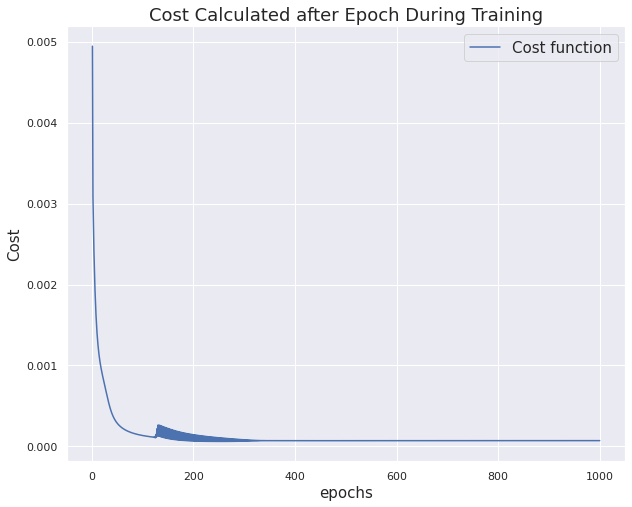

In [ ]:
node.plot_cost_function()
plt.show()

In [ ]:
x0 = np.array([xi[0] for xi, yi in zip(X,y) if yi == 0])
x1 = np.array([xi[0] for xi, yi in zip(X,y) if yi == 1])

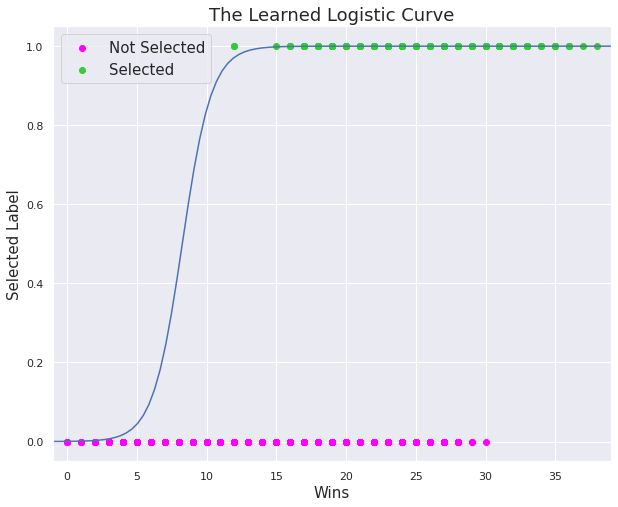

In [ ]:
plt.figure(figsize = (10, 8))
plt.xlim((-1, 39))
plt.scatter(np.array(x0), 
            np.zeros(len(x0)), 
            color = "magenta", 
            label = "Not Selected")
plt.scatter(np.array(x1), 
            np.ones(len(x1)), 
            color = "limegreen", 
            label = "Selected")

domain = np.linspace(-1, 39, 100)
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("Wins", fontsize = 15)
plt.ylabel("Selected Label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("The Learned Logistic Curve", fontsize = 18)
plt.show()

What's going on here? It seems like the regression curve ignored most of the "Not Selected" data. We can see what's really going on with this model if we plot these data as histograms instead. We will still include the regression curve, scaled to fit the figure.

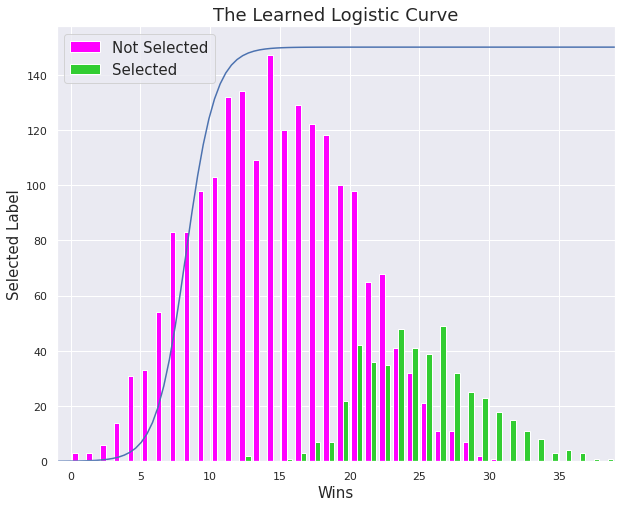

In [ ]:
plt.figure(figsize = (10, 8))
plt.xlim((-1,39))

plt.hist([x0,x1],
         bins = list(range(40)),
         density = False,
         color = ["magenta", "limegreen"] ,
         label = ["Not Selected","Selected"])

plt.plot(domain, node.predict(domain.reshape(-1, 1))*150)
plt.xlabel("Wins", fontsize = 15)
plt.ylabel("Selected Label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("The Learned Logistic Curve", fontsize = 18)
plt.show()


So, it becomes clear that being selected is more rare than not being selected, so we will see what happens when we choose equal sample sizes

In [ ]:
x0 = np.array([xi[0] for xi, yi in zip(X,y) if yi == 0])
x1 = np.array([xi[0] for xi, yi in zip(X,y) if yi == 1])

y0 = np.array([0 for xi, yi in zip(X,y) if yi == 0])
y1 = np.array([1 for xi, yi in zip(X,y) if yi == 1])

X_train = np.concatenate((x0[0:50], x1[0:50]))
y_train = np.concatenate((y0[0:50], y1[0:50]))

node2 = SingleNeuron(sigmoid, cross_entropy_loss)
node2.train(X, y, alpha = 0.05, epochs = 5_000)

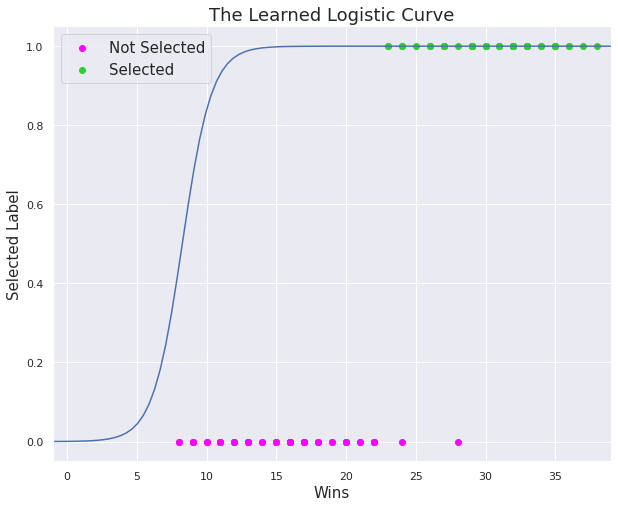

In [ ]:
plt.figure(figsize = (10, 8))
plt.xlim((-1, 39))
plt.scatter(np.array(x0[0:50]), 
            np.zeros(50), 
            color = "magenta", 
            label = "Not Selected")
plt.scatter(np.array(x1[0:50]), 
            np.ones(50), 
            color = "limegreen", 
            label = "Selected")

domain = np.linspace(-1, 39, 100)
plt.plot(domain, node2.predict(domain.reshape(-1, 1)))
plt.xlabel("Wins", fontsize = 15)
plt.ylabel("Selected Label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("The Learned Logistic Curve", fontsize = 18)
plt.show()

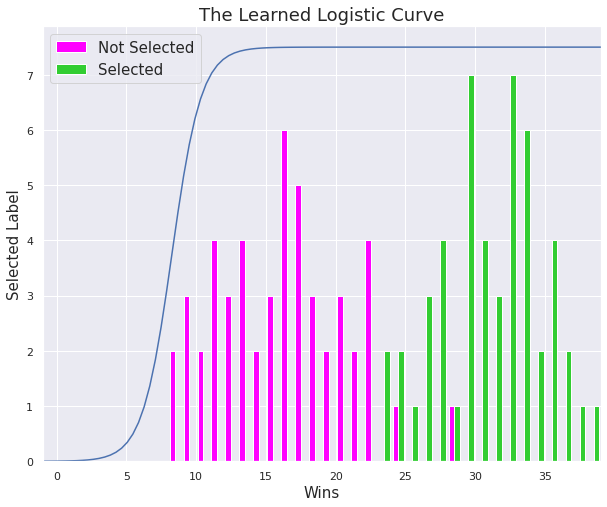

In [ ]:
plt.figure(figsize = (10, 8))
plt.xlim((-1,39))

plt.hist([x0[0:50],x1[0:50]],
         bins = list(range(40)),
         density = False,
         color = ["magenta", "limegreen"] ,
         label = ["Not Selected","Selected"])

plt.plot(domain, node2.predict(domain.reshape(-1, 1))*7.5)
plt.xlabel("Wins", fontsize = 15)
plt.ylabel("Selected Label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("The Learned Logistic Curve", fontsize = 18)
plt.show()

It seems like Logistic Regression is a powerful tool, but it cannot do too much by itself. Later, we will see where it becomes especially powerful.